# TP 1 - Équation de la chaleur
## $\theta$ schéma

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et $\theta$ schéma :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\theta\frac{u_{j+1}^n-2u_j^n+u_{j-1}^n}{\Delta x^2}-(1-\theta)\frac{u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}}{\Delta x^2} = 0. $$ 

$\alpha = \frac{\nu \delta t}{\delta x^2}$

$$A = \begin{pmatrix} 1+2\alpha(1-\theta) & -\alpha(1-\theta) & 0 & \dots \\
-\alpha(1-\theta) & 1+2\alpha(1-\theta) & -\alpha(1-\theta) &  \ddots & \\
& \ddots & \ddots & 0 \\
0 & \ddots & \ddots &  -\alpha(1-\theta)  \\
0 & \dots  & -\alpha(1-\theta) & 1+2\alpha(1-\theta)
\end{pmatrix}$$

$$B = \begin{pmatrix} 1-2\alpha\theta & \alpha\theta & 0 & \dots \\
\alpha\theta & 1-2\alpha\theta & \alpha\theta &  \ddots & \\
& \ddots & \ddots & 0 \\
0 & \ddots & \ddots &  \alpha\theta  \\
0 & \dots  & \alpha\theta & 1-2\alpha\theta
\end{pmatrix}$$

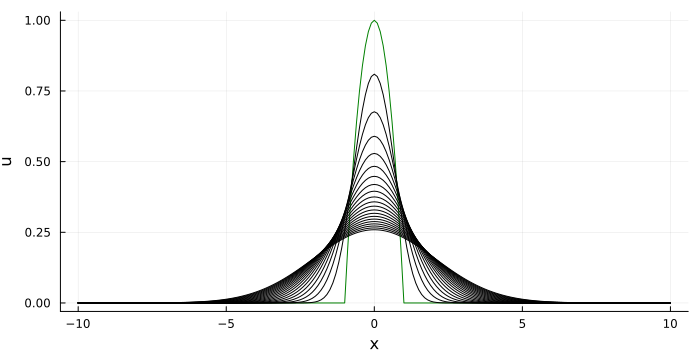

In [11]:
using LinearAlgebra, Plots

# Parameters
L = 10.0                               # domain half size
Nx = 2*100                               # grid size (space)
Δx = 2*L/Nx                            # step size (space)
#σ = 0.1                               # CFL
α = 1
ν = 1
Δt = (α*(Δx)^2)/(ν)                    # step size (time)
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition

θ = 0.5


# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

# On écrit sous forme AU^(n+1)=BU^n en définissant A et B après les avoir calculés à la main
A = Tridiagonal((-α*(1-θ))*ones(Nx), (1+2*α*(1-θ))*ones(Nx+1), (-α*(1-θ))*ones(Nx))
B = Tridiagonal((θ*α)*ones(Nx), (1-2*θ*α)*ones(Nx+1), (θ*α)*ones(Nx))

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

__Question 3__



__Question 4__ 

Pour $\theta \leq 1/2$ \
Lorsque l'on augmente le paramètre $\alpha$, on remarque que la diffusion numérique est plus importante. Cependant, la solution n'explose pas ce qui signifie que le schéma est inconditionnellement stable.

Pour $\theta > 1/2$ \
Lorsque l'on augmente le paramètre $\alpha$, on remarque que la diffusion numérique est plus importante. Cependant, la solution explose ce qui signifie que le schéma est conditionnellement stable selon les valeurs de $\theta$.

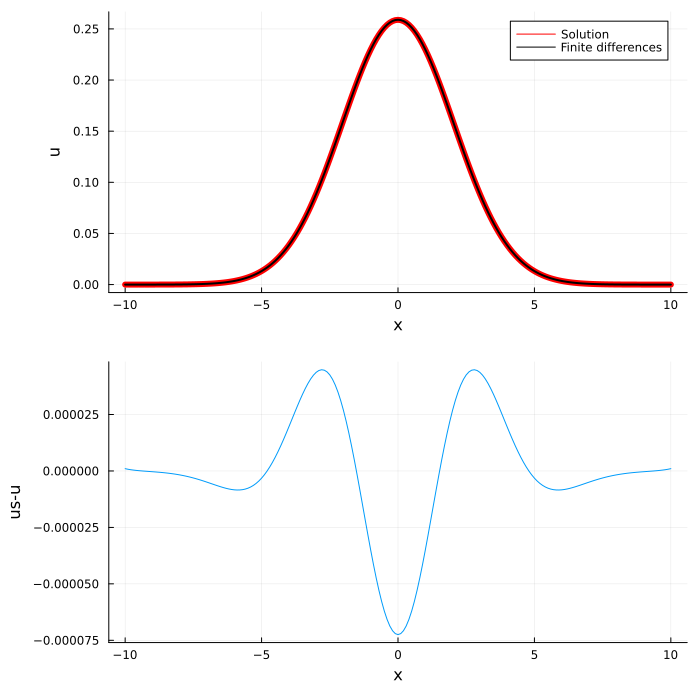

Δx: 0.1	 Δt:0.010000000000000002	 max error: 7.247124676112993e-5


In [12]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

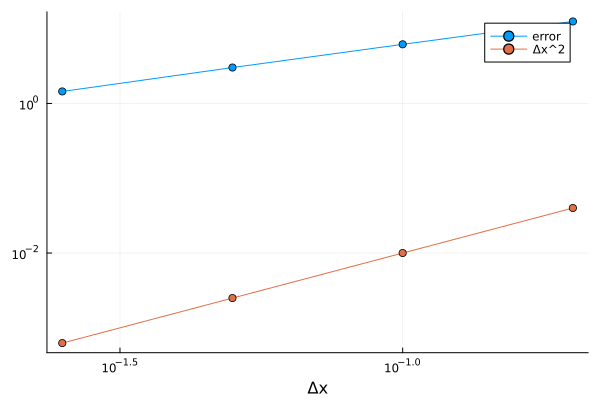

In [13]:
# Precision test for theta = 0.5
Δx = [ 0.2 , 0.1, 0.05, 0.025]
errx = [ 12.484757889319871, 6.176926584269471, 3.023010931744433, 1.447278273545668 ]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

__Question 3__
On remarque que la courbe obtenue est parallèle à la courbe de $\Delta x^2$, ce qui nous confirme bien que l'erreur de troncature du schéma est en o($\Delta x^2$).

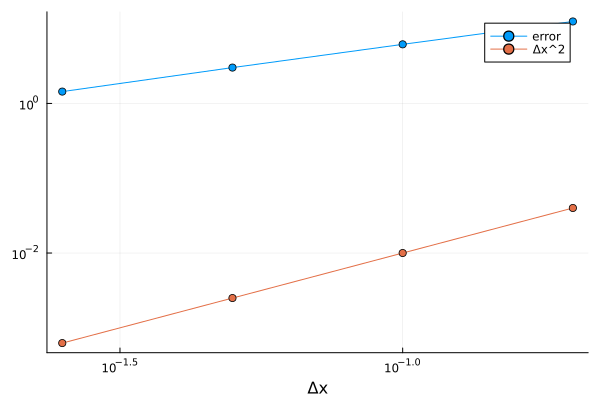

In [14]:
# Precision test for theta = 0.75
Δx = [ 0.2 , 0.1, 0.05, 0.025]
errx = [ 12.477814583581186, 6.169983278530785, 3.0160676260057473, 1.4403349678069823 ]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

On remarque que la courbe obtenue est parallèle à la courbe de $\Delta x^2$, ce qui nous confirme bien que l'erreur de troncature du schéma est en o($\Delta x^2$).

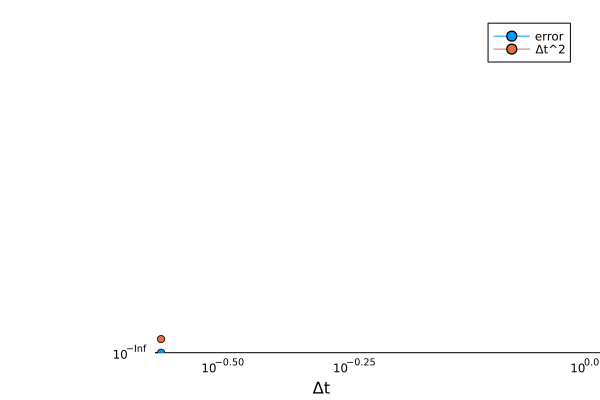

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/emilien/.julia/packages/PlotUtils/igbcf/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/emilien/.julia/packages/PlotUtils/igbcf/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/emilien/.julia/packages/PlotUtils/igbcf/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/emilien/.julia/packages/PlotUtils/igbcf/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/emilien/.julia/packages/PlotUtils/igbcf/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/emilien/.julia/packages/PlotUtils/igbcf/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/emilien/.julia/packages/PlotUtils/igbcf/src/ticks.jl:191


In [15]:
# Time precision test for theta = 0.5
Δt = [ 0.2 ]
errt = [ 0 ]
plot(Δt, errt, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δt", label="error")
plot!(Δt, Δt.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δt", label="Δt^2")